In [2]:
## Installing and importing Libraries

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

## Importing the Country relationships file

In [5]:
relationship_df = pd.read_csv('relationships.csv')

## Creating a network object from the countries relationships dataframe

In [7]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df,
                source = "Source",
                target = "Target",
                edge_attr =  "Value",
                create_using = nx.Graph())

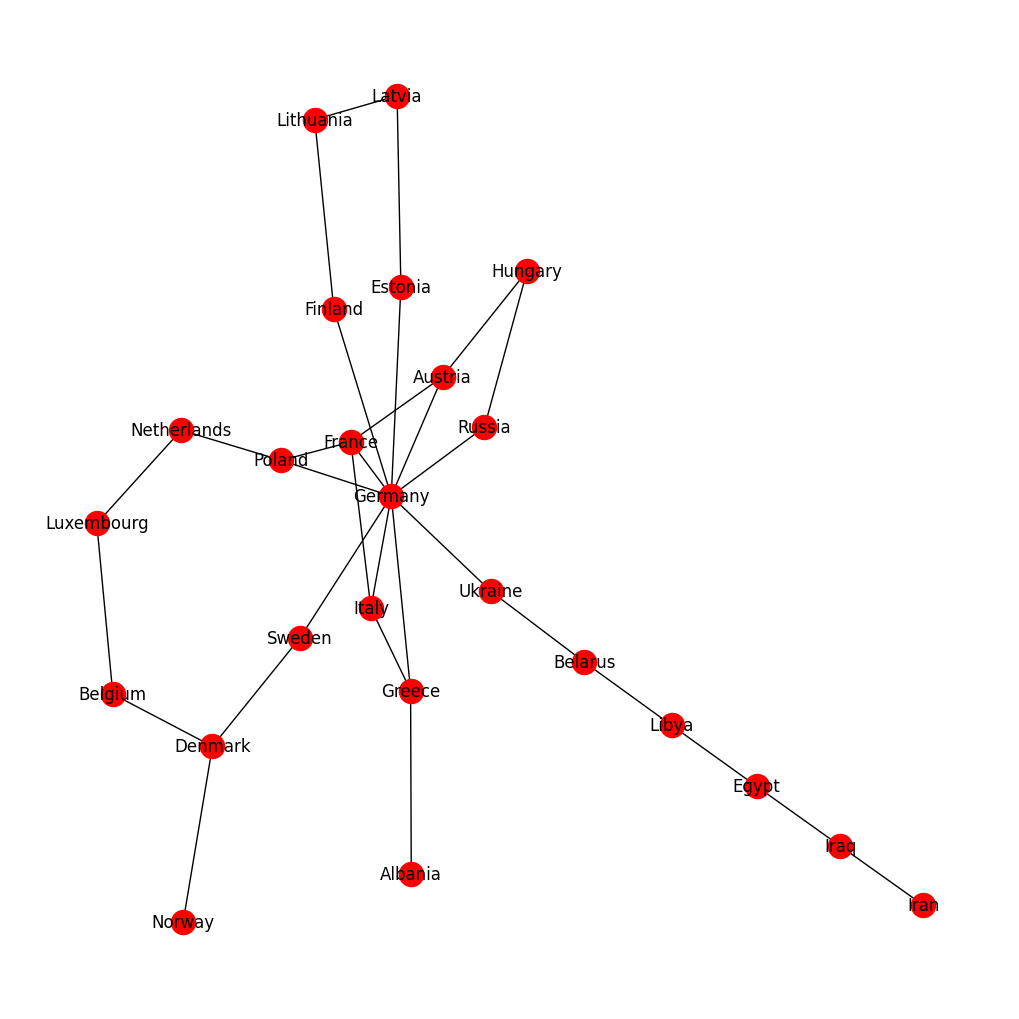

In [8]:
plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)

## Observation

From the look of the diagram, we seem to have a scale-free network with Germany being at the center of it all.
So from my observation, Germany must have played a great role in the key events that shaped the 20th century.

## Creating a static network graph using only NetworkX

## Building an interactive network graph from your network object, and save it as an HTML file

In [11]:
# Assuming you already have your graph (G) created using NetworkX

# Define the pyvis network object
net = Network(notebook=True, width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define node degree (number of connections each node has)
Node_degree = dict(G.degree)

# Setting up node size attributes based on degree
nx.set_node_attributes(G, Node_degree, 'size')

# Convert the NetworkX graph into the pyvis network format
net.from_nx(G)

# Show buttons for interactive control (zoom, layout change, etc.)
net.show_buttons(filter_=True)

# Optional: Set repulsion to adjust the layout (distance between nodes)
net.repulsion()

# Display the graph in an HTML file
net.show("countries.html")


countries.html


## Observations

The large size of Germany's dot, compared to other countries, indicates that it was likely involved in a significant number of key events, interactions, or relationships throughout the text. This centrality could reflect Germany's influence, historical importance, or the frequency with which it is mentioned in relation to other countries. Therefore, Germany stands out as a major player in the historical events or the socio-political dynamics described in the text, reinforcing its importance as a focal point in the narrative.

## Applying the Leiden algorithm to detect any communities within the countries

In [13]:
from cdlib import algorithms

# Assuming G is your NetworkX graph
coms = algorithms.leiden(G)

# Output the detected communities
print(coms.communities)


[['Austria', 'France', 'Hungary', 'Russia', 'Germany', 'Italy', 'Poland', 'Greece', 'Albania'], ['Ukraine', 'Belarus', 'Libya', 'Egypt', 'Iraq', 'Iran'], ['Netherlands', 'Luxembourg', 'Belgium', 'Denmark', 'Norway', 'Sweden'], ['Estonia', 'Latvia', 'Lithuania', 'Finland']]


In [18]:
new_com = coms.to_node_community_map()

new_com

defaultdict(list,
            {'Austria': [0],
             'France': [0],
             'Hungary': [0],
             'Russia': [0],
             'Germany': [0],
             'Italy': [0],
             'Poland': [0],
             'Greece': [0],
             'Albania': [0],
             'Ukraine': [1],
             'Belarus': [1],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'Iran': [1],
             'Netherlands': [2],
             'Luxembourg': [2],
             'Belgium': [2],
             'Denmark': [2],
             'Norway': [2],
             'Sweden': [2],
             'Estonia': [3],
             'Latvia': [3],
             'Lithuania': [3],
             'Finland': [3]})

In [19]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k, v in new_com.items()}

## Visualize the output of the communities algorithm on a new network graph and save it as HTML.
## Write your observations in a Markdown cell. Does the partition make sense according to history? 
## What other conclusions can you make about the connections between the communities?

In [20]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


## Observations

From my observation, this could reflect regional cooperation or regionalism, where countries within a community share common regional interests, such as economic ties, military alliances, or shared borders.
The illustration could provide a historical narrative of global connectivity, illustrating how alliances and relationships have shifted such as the formation of the European Union or ASEAN. It could also highlight key turning points in global events, such as major diplomatic treaties or the emergence of new geopolitical powers. For example, a community of European countries with Germany at the center(blue color) might have had deep connections with each other over time.

## Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. 
## In the markdown cells underneath, note your observations about the outputs.

In [21]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Austria': 0.125,
 'France': 0.16666666666666666,
 'Hungary': 0.08333333333333333,
 'Russia': 0.08333333333333333,
 'Germany': 0.41666666666666663,
 'Ukraine': 0.08333333333333333,
 'Italy': 0.125,
 'Poland': 0.125,
 'Estonia': 0.08333333333333333,
 'Latvia': 0.08333333333333333,
 'Lithuania': 0.08333333333333333,
 'Finland': 0.08333333333333333,
 'Netherlands': 0.08333333333333333,
 'Luxembourg': 0.08333333333333333,
 'Belgium': 0.08333333333333333,
 'Denmark': 0.125,
 'Norway': 0.041666666666666664,
 'Sweden': 0.08333333333333333,
 'Greece': 0.125,
 'Albania': 0.041666666666666664,
 'Belarus': 0.08333333333333333,
 'Libya': 0.08333333333333333,
 'Egypt': 0.08333333333333333,
 'Iraq': 0.08333333333333333,
 'Iran': 0.041666666666666664}

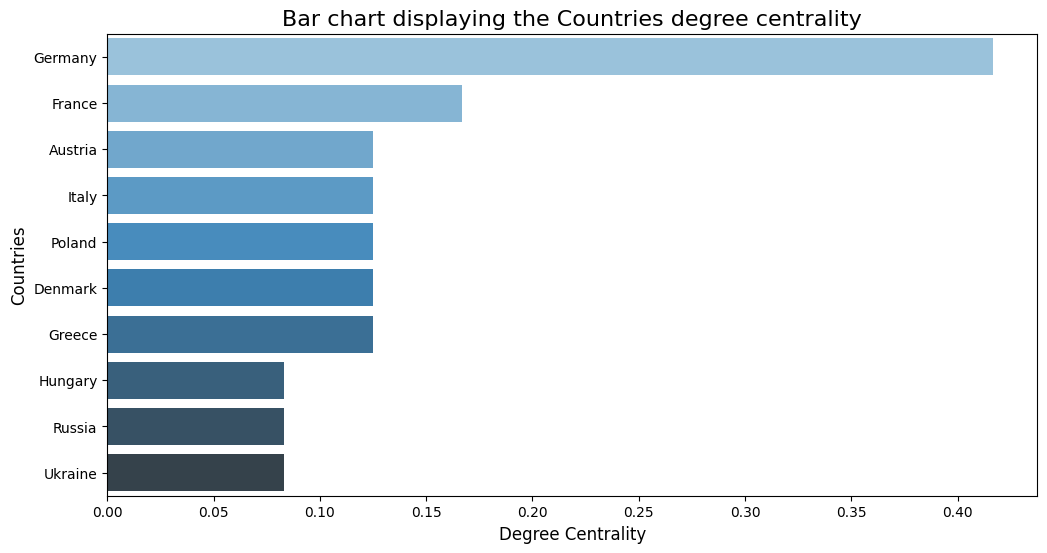

In [28]:
# Assuming degree_dict is already calculated
# Sort the degree centrality values in descending order
sorted_degree_dict = dict(sorted(degree_dict.items(), key=lambda item: item[1], reverse=True))

# Prepare top 10 countries with highest degree centrality
top10 = {k: v for k, v in sorted_degree_dict.items() if k in list(sorted_degree_dict.keys())[:10]}

# Convert to DataFrame for seaborn plotting
import pandas as pd
top10_df = pd.DataFrame(list(top10.items()), columns=['Countries', 'Degree Centrality'])

# Plot using seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Degree Centrality', y='Countries', data=top10_df, palette="Blues_d", saturation=0.9)

# Add title and labels
plt.title('Bar chart displaying the Countries degree centrality', fontsize=16)
plt.xlabel('Degree Centrality', fontsize=12)
plt.ylabel('Countries', fontsize=12)

# Show the plot
plt.show()


## Observation

The countries with the highest degree of centrality are located at the top of the bar chart, with longer bars indicating more connections with other countries. For example, Germany stands out with the longest bar, having a degree centrality of over 0.40. This substantial value reflects that Germany has a large number of direct connections to other countries within the network, signifying its significant role in shaping global dynamics.

A degree centrality of 0.40 indicates that Germany is not just well-connected but also positioned at the core of the global network. Its strong interconnections suggest that Germany was actively engaged in a variety of international affairs throughout the 20th century, whether in the context of diplomatic negotiations, economic trade, or historical events.

In [29]:
# Degree of closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_dict

{'Austria': 0.3380281690140845,
 'France': 0.35294117647058826,
 'Hungary': 0.2608695652173913,
 'Russia': 0.3333333333333333,
 'Germany': 0.47058823529411764,
 'Ukraine': 0.375,
 'Italy': 0.3380281690140845,
 'Poland': 0.35294117647058826,
 'Estonia': 0.3380281690140845,
 'Latvia': 0.26373626373626374,
 'Lithuania': 0.26373626373626374,
 'Finland': 0.3380281690140845,
 'Netherlands': 0.2823529411764706,
 'Luxembourg': 0.2376237623762376,
 'Belgium': 0.2376237623762376,
 'Denmark': 0.2891566265060241,
 'Norway': 0.22641509433962265,
 'Sweden': 0.3582089552238806,
 'Greece': 0.3380281690140845,
 'Albania': 0.2553191489361702,
 'Belarus': 0.3037974683544304,
 'Libya': 0.25,
 'Egypt': 0.20869565217391303,
 'Iraq': 0.17647058823529413,
 'Iran': 0.1509433962264151}

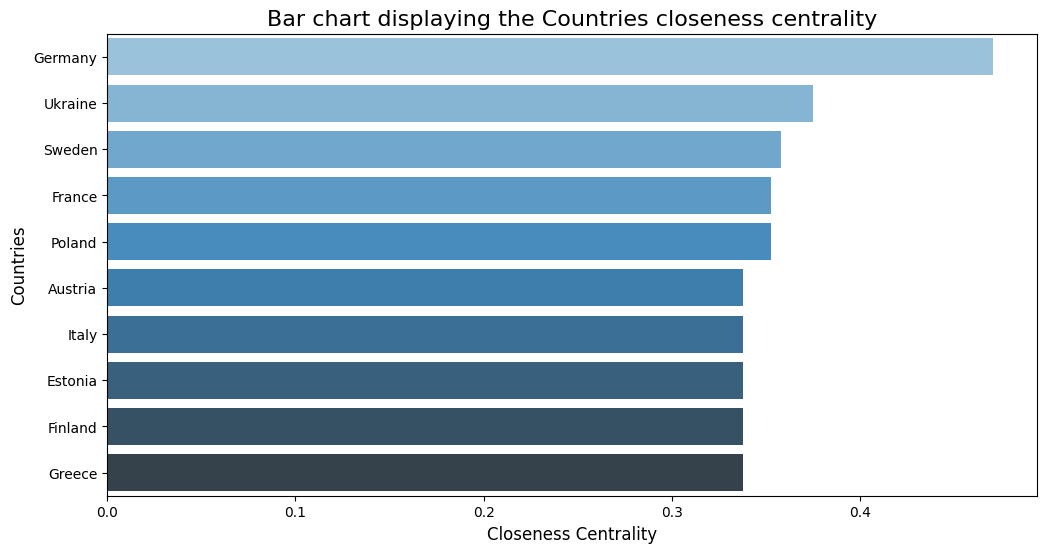

In [30]:
# Assuming degree_dict is already calculated
# Sort the degree centrality values in descending order
sorted_closeness_dict = dict(sorted(closeness_dict.items(), key=lambda item: item[1], reverse=True))

# Prepare top 10 countries with highest closeness centrality
top10 = {k: v for k, v in sorted_closeness_dict.items() if k in list(sorted_closeness_dict.keys())[:10]}

# Convert to DataFrame for seaborn plotting
import pandas as pd
top10_df = pd.DataFrame(list(top10.items()), columns=['Countries', 'Closeness centrality'])

# Plot using seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Closeness centrality', y='Countries', data=top10_df, palette="Blues_d", saturation=0.9)

# Add title and labels
plt.title('Bar chart displaying the Countries closeness centrality', fontsize=16)
plt.xlabel('Closeness Centrality', fontsize=12)
plt.ylabel('Countries', fontsize=12)

# Show the plot
plt.show()


## Observation

A closeness centrality of 0.47 indicates that Germany is positioned in such a way that it can interact with most countries with fewer steps or intermediaries. It’s essentially a key hub in the network, reducing the number of connections needed to reach any other country. This closeness also suggests that Germany played a critical role in facilitating global communication and cooperation across various spheres. 

With high closeness centrality, Germany could easily influence or initiate discussions and negotiations with a broad range of countries. It reflects a strategic positioning where Germany could quickly engage in global diplomacy and have its voice heard in international matters.

In [31]:
# Degree of betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweenness_dict

{'Austria': 0.044082125603864736,
 'France': 0.01751207729468599,
 'Hungary': 0.0018115942028985507,
 'Russia': 0.0356280193236715,
 'Germany': 0.8013285024154589,
 'Ukraine': 0.34420289855072467,
 'Italy': 0.0036231884057971015,
 'Poland': 0.1358695652173913,
 'Estonia': 0.07608695652173914,
 'Latvia': 0.0036231884057971015,
 'Lithuania': 0.0036231884057971015,
 'Finland': 0.07608695652173914,
 'Netherlands': 0.07427536231884058,
 'Luxembourg': 0.016304347826086956,
 'Belgium': 0.018115942028985508,
 'Denmark': 0.1539855072463768,
 'Norway': 0.0,
 'Sweden': 0.20108695652173914,
 'Greece': 0.08333333333333333,
 'Albania': 0.0,
 'Belarus': 0.2898550724637681,
 'Libya': 0.2282608695652174,
 'Egypt': 0.15942028985507248,
 'Iraq': 0.08333333333333333,
 'Iran': 0.0}

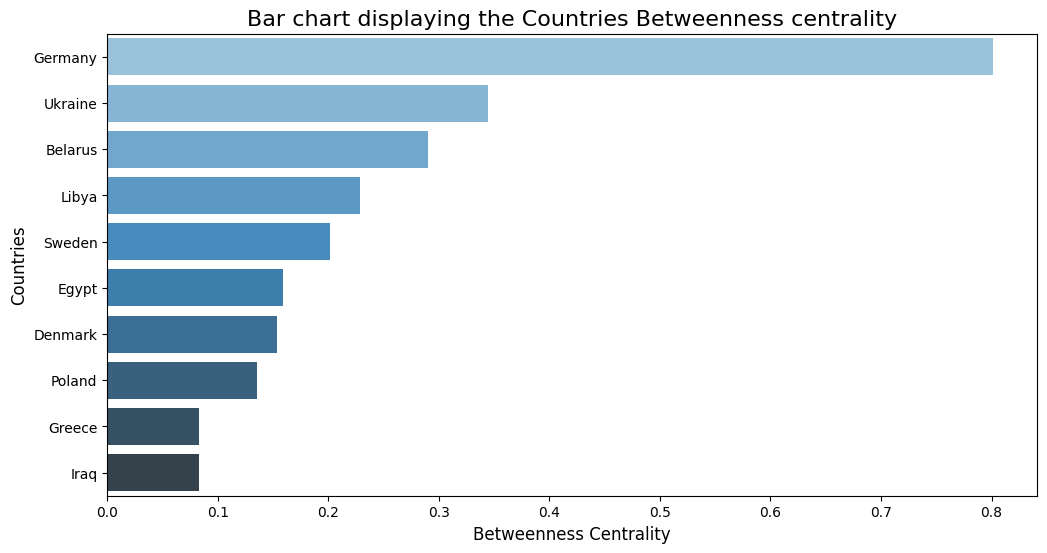

In [32]:
# Assuming degree_dict is already calculated
# Sort the degree betweenness values in descending order
sorted_betweenness_dict = dict(sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True))

# Prepare top 10 countries with highest betweenness centrality
top10 = {k: v for k, v in sorted_betweenness_dict.items() if k in list(sorted_betweenness_dict.keys())[:10]}

# Convert to DataFrame for seaborn plotting
import pandas as pd
top10_df = pd.DataFrame(list(top10.items()), columns=['Countries', 'betweenness centrality'])

# Plot using seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='betweenness centrality', y='Countries', data=top10_df, palette="Blues_d", saturation=0.9)

# Add title and labels
plt.title('Bar chart displaying the Countries Betweenness centrality', fontsize=16)
plt.xlabel('Betweenness Centrality', fontsize=12)
plt.ylabel('Countries', fontsize=12)

# Show the plot
plt.show()


## Observation

With a betweenness centrality of over 0.80, Germany is positioned as a critical intermediary in global relations. Germany’s actions were likely crucial in connecting different regions, and without it, many interactions would either take longer or be less efficient. Germany has the power to shape the paths of communication and economic exchange, meaning it could either facilitate or impede interactions between other countries compared to other countries like Iraq with a betweenness centrality of about 0.083333.